To identify all the unique entries of the graphics column and plot them in a graph/chart to show their distribution. 

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/final_0_80509.csv")

C:\Users\Kiyo\AppData\Local\Temp\ipykernel_19512\2853391003.py:1: DtypeWarning: Columns (10,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/final_0_80509.csv")


In [4]:
graphics_counts = df['Graphics'].value_counts()
directx_12_pattern = r'DirectX 12|dx12|dx 12'
directx_11_pattern = r'DirectX 11|dx11|dx 11'
directx_10_pattern = r'DirectX 10|dx10| dx 10'
shader_model_2b_3_pattern = r'DirectX 9 Shader Model 2b and 3.0|dx9|dx 9'
shader_model_2_pattern = r'DirectX 9 Shader Model 2.0 GPUs|DirectX 9.0|dx 9.0|dx9.0'
directx_8_below_pattern = r'DirectX 8|DirectX 7|DirectX 6|DirectX 5|DirectX 4|dx 8|dx 7|dx 6|dx 5|dx 4|dx8|dx7|dx6|dx5|dx4'

directx_12_count = graphics_counts[graphics_counts.index.str.contains(directx_12_pattern, case=False)].sum()
directx_11_count = graphics_counts[graphics_counts.index.str.contains(directx_11_pattern, case=False)].sum()
directx_10_count = graphics_counts[graphics_counts.index.str.contains(directx_10_pattern, case=False)].sum()
shader_model_2b_3_count = graphics_counts[graphics_counts.index.str.contains(shader_model_2b_3_pattern, case=False)].sum()
shader_model_2_count = graphics_counts[graphics_counts.index.str.contains(shader_model_2_pattern, case=False)].sum()
directx_8_below_count = graphics_counts[graphics_counts.index.str.contains(directx_8_below_pattern, case=False)].sum()

# Create a dictionary with counts for each category
graphics_categories = {
    'DirectX 12 GPUs': directx_12_count,
    'DirectX 11 GPUs': directx_11_count,
    'DirectX 10 GPUs': directx_10_count,
    'DirectX 9 Shader Model 2b and 3.0 GPUs': shader_model_2b_3_count,
    'DirectX 9 Shader Model 2.0 GPUs': shader_model_2_count,
    'DirectX 8 GPUs and below': directx_8_below_count
}
graphics_categories

{'DirectX 12 GPUs': 610,
 'DirectX 11 GPUs': 1830,
 'DirectX 10 GPUs': 1798,
 'DirectX 9 Shader Model 2b and 3.0 GPUs': 602,
 'DirectX 9 Shader Model 2.0 GPUs': 1787,
 'DirectX 8 GPUs and below': 383}

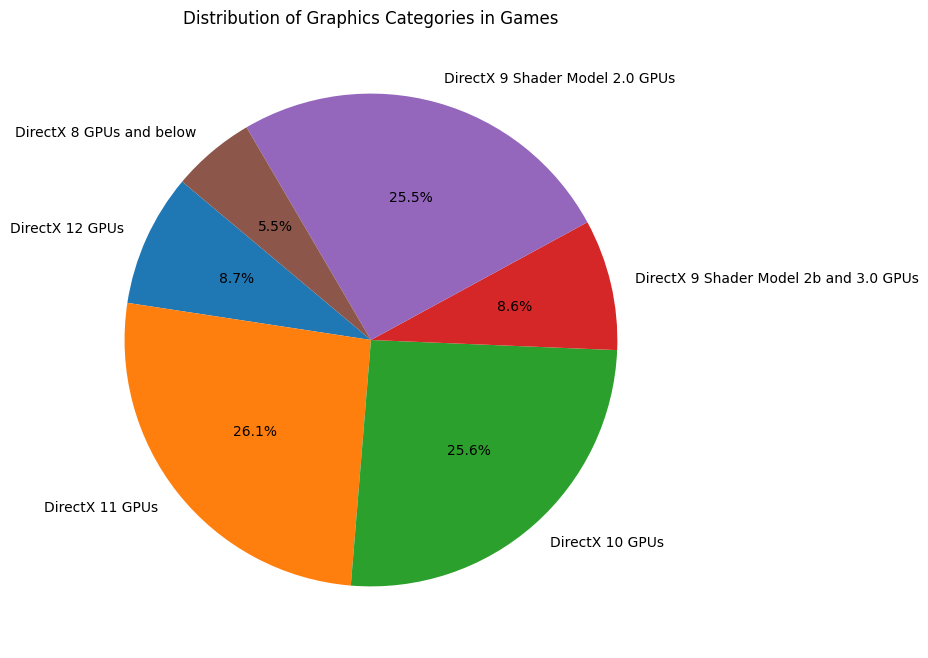

In [5]:
plt.figure(figsize=(8, 8))
plt.pie(graphics_categories.values(), labels=graphics_categories.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Graphics Categories in Games')
plt.show()

DirectX is a collection of application programming interfaces (APIs) for handling tasks related to multimedia, especially game programming and video.
Graphical Processing Units supporting DirectX 10 or higher makes the majority of games. This shows that developers are slowly abondoning the older technologies while highly focusing on newer technologies.

In [6]:
x = pd.read_csv('..\data-analysis\graphics_cards.txt', header=None, names=['Text'])
specified_graphics = x['Text'].tolist()
specified_graphics

graphics_counts = {graphics_type: 0 for graphics_type in specified_graphics}

for graphics_entry in df['Graphics']:
    if pd.notna(graphics_entry):
        for graphics_type in specified_graphics:
            if graphics_type in graphics_entry:
                graphics_counts[graphics_type] += 1
                
graphics_counts

{'AMD Radeon(TM) Graphics': 3,
 'AMD Radeon Graphics': 130,
 'AMD Radeon RX 550': 59,
 'AMD Radeon RX 570': 103,
 'AMD Radeon RX 580': 100,
 'AMD Radeon RX 580 2048SP': 1,
 'AMD Radeon RX 5500 XT': 3,
 'AMD Radeon RX 5600 XT': 4,
 'AMD Radeon RX 5700 XT': 3,
 'AMD Radeon RX 6600': 4,
 'AMD Radeon RX 6600 XT': 3,
 'AMD Radeon RX 6650 XT': 0,
 'AMD Radeon RX 6700 XT': 0,
 'AMD Radeon RX 6750 XT': 0,
 'AMD Radeon RX 6800 XT': 0,
 'AMD Radeon RX 6900 XT': 0,
 'AMD Radeon RX 7900 XTX': 0,
 'AMD Radeon Vega 3 Graphics': 0,
 'AMD Radeon Vega 8 Graphics': 2,
 'Intel(R) UHD Graphics': 46,
 'Intel HD Graphics 520': 75,
 'Intel HD Graphics 620': 65,
 'Intel HD Graphics 4000': 495,
 'Intel HD Graphics 4600': 81,
 'Intel Haswell': 1,
 'Intel Iris Xe Graphics': 10,
 'Intel Ivy Bridge': 1,
 'Intel UHD Graphics 600': 6,
 'Intel UHD Graphics 620': 70,
 'Intel UHD Graphics 630': 38,
 'NVIDIA GeForce 940M': 33,
 'NVIDIA GeForce GT 710': 23,
 'NVIDIA GeForce GT 730': 76,
 'NVIDIA GeForce GT 1030': 27,
 'N

<Figure size 3600x2000 with 0 Axes>

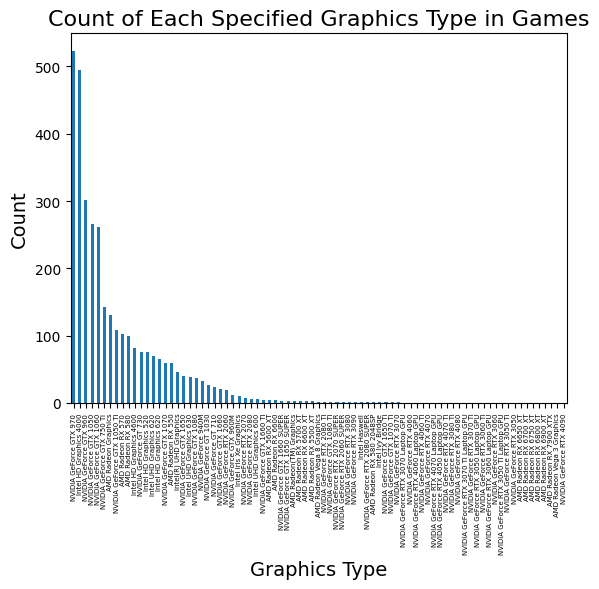

In [7]:
graphics_df = pd.DataFrame(list(graphics_counts.items()), columns=['Graphics Type', 'Count'])

plt.figure(figsize=(36,20))
bar_plot = graphics_df.sort_values(by='Count', ascending=False).plot(kind='bar', x='Graphics Type', y='Count', legend=False)
bar_plot.set_xlabel('Graphics Type', fontsize=14)  
bar_plot.set_ylabel('Count', fontsize=14)  
plt.title('Count of Each Specified Graphics Type in Games', fontsize=16)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, fontsize=5)
plt.show()

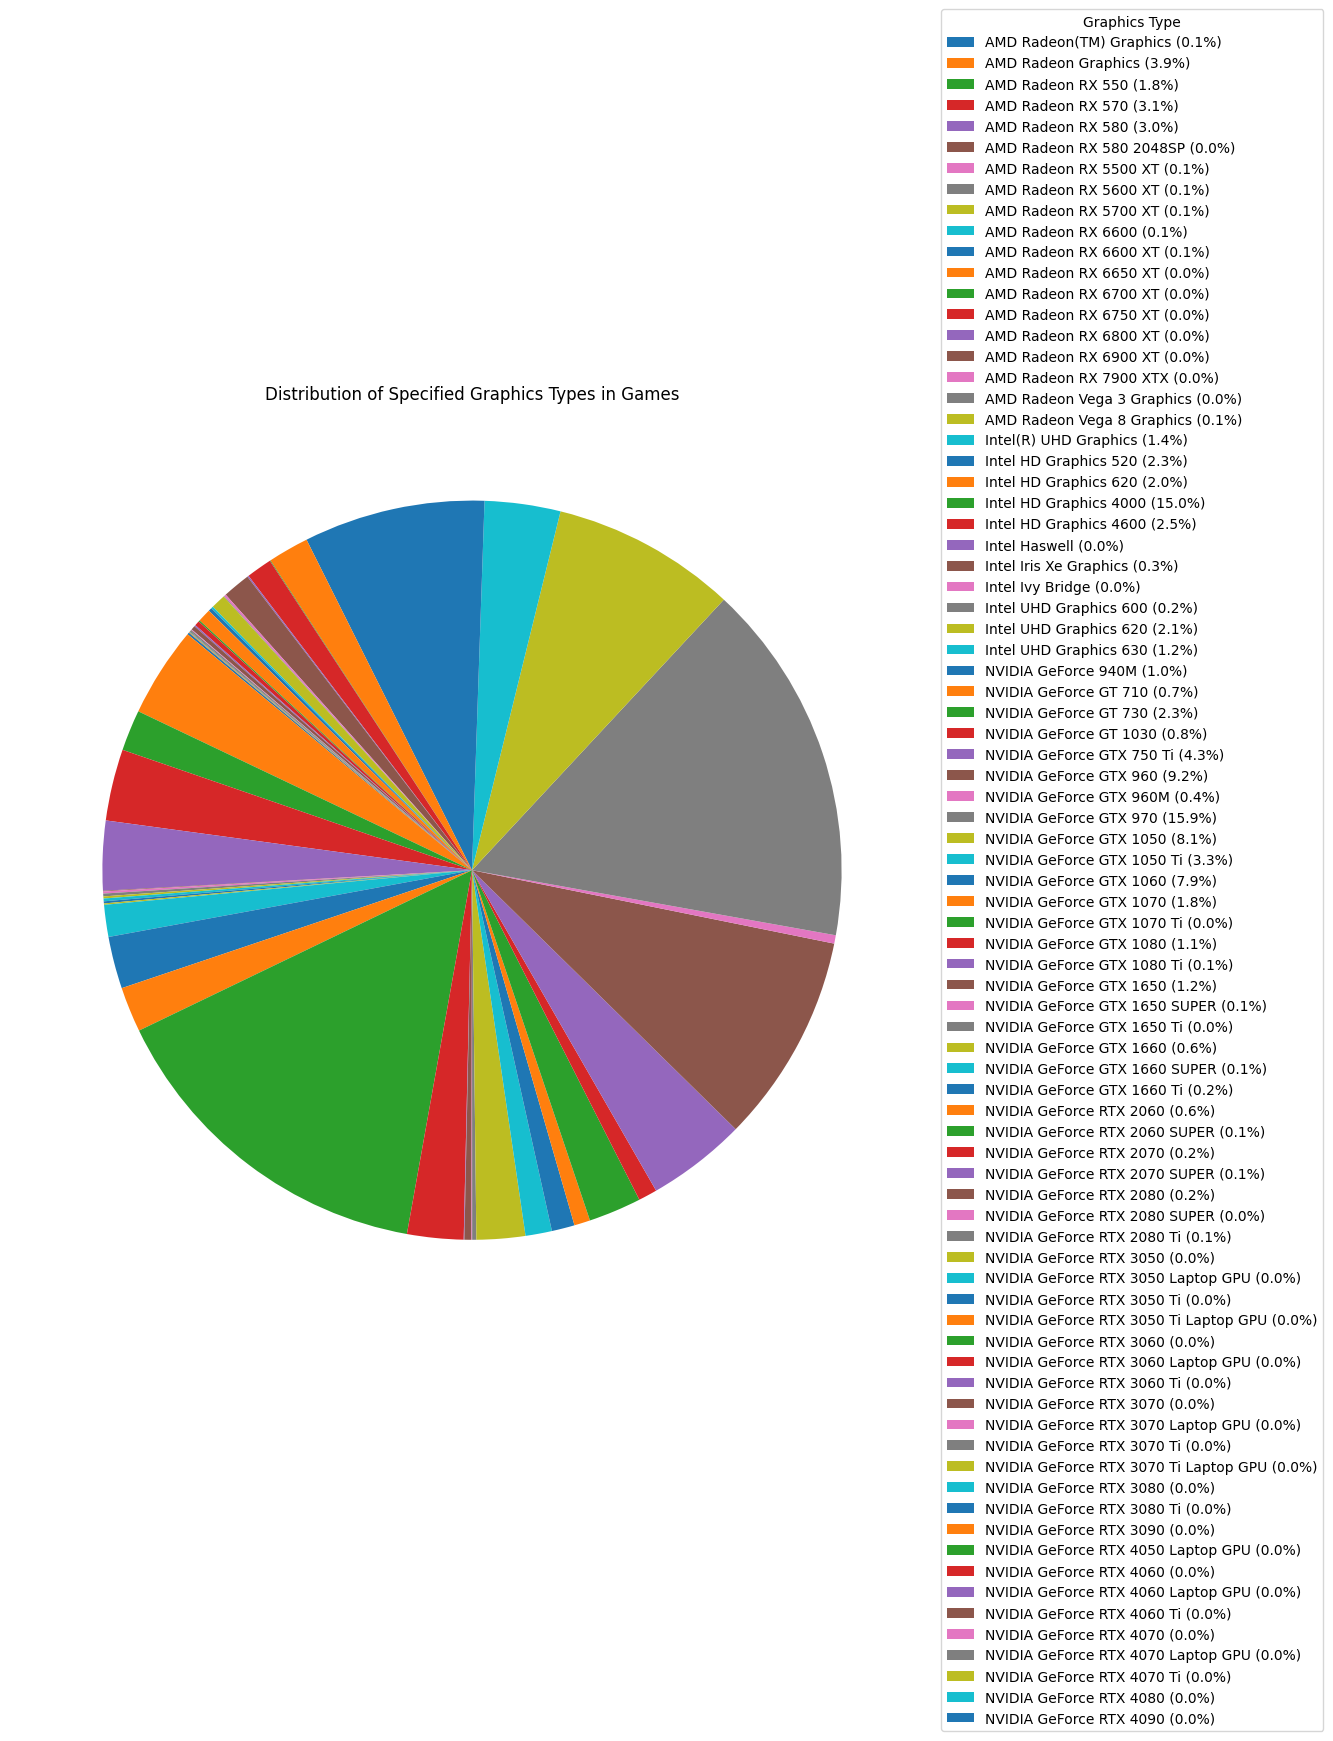

In [8]:
total_count = graphics_df['Count'].sum()
graphics_df['Percentage'] = (graphics_df['Count'] / total_count) * 100

plt.figure(figsize=(12, 12))
plt.pie(graphics_df['Count'], labels=None, startangle=140)

legend_labels = [f"{label} ({percentage:.1f}%)"
                 for label, percentage in zip(graphics_df['Graphics Type'], graphics_df['Percentage'])]

plt.legend(legend_labels, title="Graphics Type", bbox_to_anchor=(1, 0.5), loc="center left")

plt.title('Distribution of Specified Graphics Types in Games')
plt.show()

From the above chart we can observe that most of the games are made for NVIDIA GeForce GTX 970 graphics card(highlighted in grey) or higher out of all 81 model of gpus. while the compatiblity of games are very diverse, we see the lack of games having requirement for newer and stronger gps. 